# Retail Store Sales Forecasting

We have taken the data set of a retail store chai which shows its weekly sales store and departmentwise. From that we have selected a single store with 5 departments to forecast the departmentwise sales.


## Installing of Packages 
In this step, we will install python packages that are useful for our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.statespace.sarimax as sarima
import statsmodels.api as sm
from pandas import datetime
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
register_matplotlib_converters()
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set()

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1168546870.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## Loading the Dataset
We are ready to load the dataset. We will do this using the read_csv command from Pandas for reading the .csv file and Let's take a glimpse at how the data looks like.

In [2]:
raw_csv_data = pd.read_csv("data_raw.csv") 
df_comp=raw_csv_data.copy()
df_comp.head()
df_comp.date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\4260112435.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_comp.date = pd.to_datetime(df_comp.Date, dayfirst = True)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Data Preparation and Cleaning
Here we will extract only the necessary data for the 5 departments.

In [3]:
del df_comp['Store']
del df_comp['IsHoliday']
del df_comp['Dept']
df_comp.head()

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


**Spliting the data into 5 different data frames according to department**

In [4]:
d1 = df_comp[:143]
d1.tail()

,Date,Weekly_Sales
138,2012-09-28,18947.81
139,2012-10-05,21904.47
140,2012-10-12,22764.01
141,2012-10-19,24185.27
142,2012-10-26,27390.81


In [5]:
d2 = df_comp[143:286]
d2.tail()

,Date,Weekly_Sales
281,2012-09-28,45784.76
282,2012-10-05,48577.08
283,2012-10-12,42112.67
284,2012-10-19,42354.72
285,2012-10-26,43134.88


In [6]:
d3 = df_comp[286:429]
d3.tail()

,Date,Weekly_Sales
424,2012-09-28,13085.95
425,2012-10-05,11676.98
426,2012-10-12,10487.17
427,2012-10-19,8548.87
428,2012-10-26,9350.90


In [7]:
d4 = df_comp[429:572]
d4.tail()

,Date,Weekly_Sales
567,2012-09-28,34647.33
568,2012-10-05,39311.93
569,2012-10-12,35446.18
570,2012-10-19,35549.19
571,2012-10-26,36292.60


In [8]:
d5 = df_comp[572:715]
d5.tail()

,Date,Weekly_Sales
710,2012-09-28,22560.39
711,2012-10-05,25508.81
712,2012-10-12,20920.03
713,2012-10-19,20413.83
714,2012-10-26,25846.94


**Setting frequency of Data as Weekly and Making Date as our index**

Here we will set the frequency as weekly starting from each Friday (W-FRI) and will be using this as the index of our dataframes

In [9]:
daterange = pd.date_range(start='2010-02-05', periods=len(d1), freq='W-FRI')

In [10]:
d1["Date"] = daterange
d1.set_index("Date", inplace = True)
d1.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1310128395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1["Date"] = daterange


,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


**Checking for Null Values**

In [11]:
d1.isna().sum()

Weekly_Sales    0
dtype: int64

In [12]:
d2["Date"] = daterange
d2.set_index("Date", inplace = True)
d2.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\278622902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2["Date"] = daterange


,Weekly_Sales
Date,
2010-02-05,50605.27
2010-02-12,44682.74
2010-02-19,47928.89
2010-02-26,44292.87
2010-03-05,48397.98


In [13]:
d2.isna().sum()

Weekly_Sales    0
dtype: int64

In [14]:
d3["Date"] = daterange
d3.set_index("Date", inplace = True)
d3.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1533860070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3["Date"] = daterange


,Weekly_Sales
Date,
2010-02-05,13740.12
2010-02-12,10887.84
2010-02-19,11523.47
2010-02-26,11135.17
2010-03-05,12275.58


In [15]:
d3.isna().sum()

Weekly_Sales    0
dtype: int64

In [16]:
d4["Date"] = daterange
d4.set_index("Date", inplace = True)
d4.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1259568514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4["Date"] = daterange


,Weekly_Sales
Date,
2010-02-05,39954.04
2010-02-12,35351.21
2010-02-19,36826.95
2010-02-26,34660.16
2010-03-05,38086.19


In [17]:
d4.isna().sum()

Weekly_Sales    0
dtype: int64

In [18]:
d5["Date"] = daterange
d5.set_index("Date", inplace = True)
d5.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\4118110774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5["Date"] = daterange


,Weekly_Sales
Date,
2010-02-05,32229.38
2010-02-12,29620.81
2010-02-19,26468.27
2010-02-26,24101.89
2010-03-05,23082.14


In [19]:
d5.isna().sum()

Weekly_Sales    0
dtype: int64

**Now all our data has been split and saved into 5 different dataframes and their Frequency and Index have also been set.
Now we can apply Time-Series analysis on them**

# Analysing the Data and Forecasting for Department 1

**Plotting Department 1 Data** <br>
Plotting the Weekly sales of Department 1 with Markers to check for patterns and trends

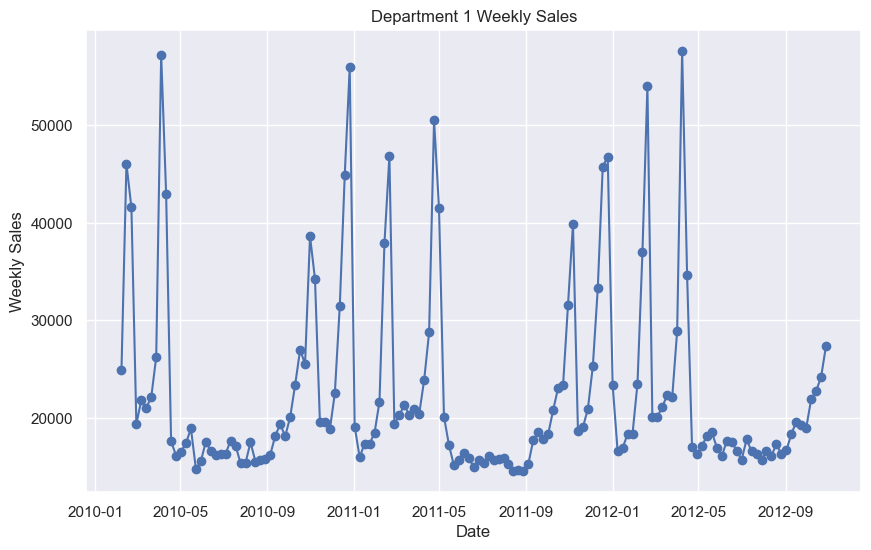

In [20]:
weekly_data = d1.resample('W').sum()
plt.figure(figsize=(10,6))
plt.plot(weekly_data.index, weekly_data['Weekly_Sales'], marker='o',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Department 1 Weekly Sales')
plt.show()

## ACF and PACF Plots
This Data will be used to find the no. of lags necessary in the Model

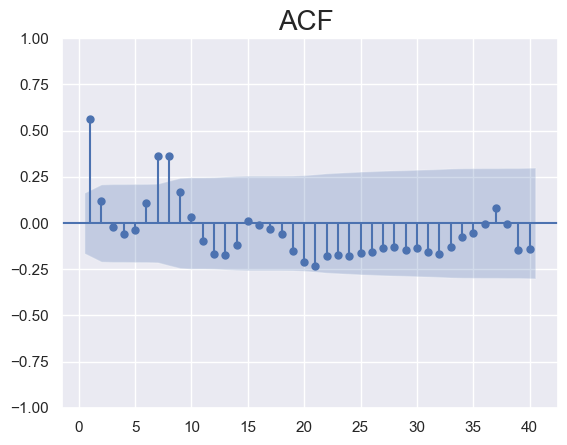

In [21]:
plot_acf(d1.Weekly_Sales, zero = False, lags = 40)
plt.title("ACF ", size = 20)
plt.show()

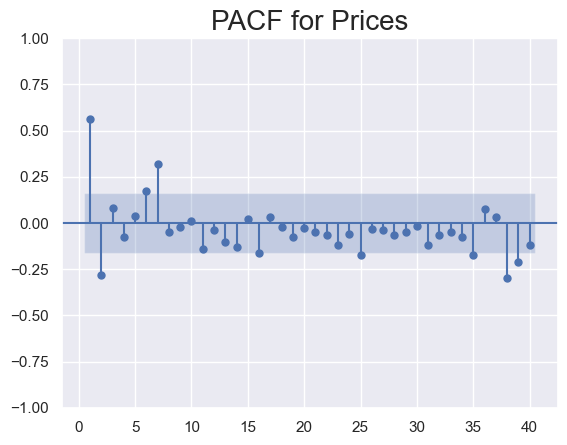

In [22]:
plot_pacf(d1.Weekly_Sales, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## Seasonal Decompose

Seasonal decomposition in time series analysis involves breaking down a time series into its key components:

Trend Component: This represents the long-term, overall pattern in the data. <br>
Seasonal Component: It captures recurring, cyclic patterns that repeat at fixed intervals. <br>
Residual Component: This is the random noise or irregular fluctuations left after removing trend and seasonality. 

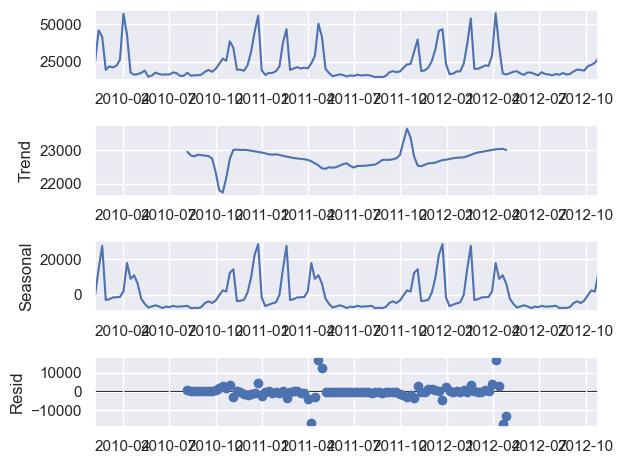

In [23]:
decompose_data = seasonal_decompose(d1, model="additive")
decompose_data.plot();

**We can see that our data is exhibiting good amount of seasonality, thus we will have to choose our Model accordingly**

## Checking Stationarity of the Data Set
stationarity means that the statistical properties of the data do not change over time. In other words, a stationary time series is one whose mean, variance, and autocorrelation structure remain constant or do not exhibit any systematic trends or seasonality. It is an important concept in time series analysis because many statistical models and techniques for forecasting assume or work best with stationary data.

## Dicky Fuller Test 
To check the stationarity we'll be using the Dicky-Fuller or the DF Test. The most important result of this test id the **p-Value** <br> 
The null hypothesis of the Dickey-Fuller test suggest that the data is Non-Stationary, i.e. the data has a structure that includes trends or seasonality. If we reject the Null Hypothesis it means that data is Stationrymeaning it lacks trends or seasonality. <br>

Ho: It is non stationary (Null Hypothesis Accepted) <br>
H1: It is stationary (Null Hypothesis Rejected) <br>

If p-Value < 0.05 , it indicates 5% chance of not rejecting null hypothesis(H1) i.e. the data is Stationary. Else, it is Non-Stationary(Ho).<br>
The below function gives the result of the DF test in an organized manner.



In [24]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [25]:
adfuller_test(d1['Weekly_Sales'])

ADF Test Statistic : -2.5221638686500385
p-value : 0.1101743228258697
#Lags Used : 6
Number of Observations Used : 136
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Diffrencing
Since the dataset is Non-Stationary we'll be using Differencing to make it stationary to get the no. of lags for our model.


Differencing is used in time series analysis to make non-stationary data more stationary. Here we try to make the statistical properties to remain relatively constant over time, thus simplifying the modeling process. There are 2 types of differencing :<br>

**1)First-Order Difference** <br>
You compute the difference between each data point and the previous data point.

**2)Seasonal Difference**<br>
Seasonal differencing is used to remove seasonality or periodic patterns in the data. We subtract an observation from the same season in the previous year or seasonally equivalent periods. Since we see something close to yearly sesonality we have kept the seasonal difference at 52 (52 weeks is 1 year)

In [26]:
d1['Sales First Difference'] = d1['Weekly_Sales'] - d1['Weekly_Sales'].shift(1)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1221612388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Sales First Difference'] = d1['Weekly_Sales'] - d1['Weekly_Sales'].shift(1)


In [27]:
d1['Weekly_Sales'].shift(1)

Date
2010-02-05         NaN
2010-02-12    24924.50
2010-02-19    46039.49
2010-02-26    41595.55
2010-03-05    19403.54
                ...   
2012-09-28    19251.50
2012-10-05    18947.81
2012-10-12    21904.47
2012-10-19    22764.01
2012-10-26    24185.27
Name: Weekly_Sales, Length: 143, dtype: float64

In [28]:
d1['Seasonal First Difference']=d1['Weekly_Sales']-d1['Weekly_Sales'].shift(52)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\3928543131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Seasonal First Difference']=d1['Weekly_Sales']-d1['Weekly_Sales'].shift(52)


In [29]:
d1.head(142)

,Weekly_Sales,Sales First Difference,Seasonal First Difference
Date,,,
2010-02-05,24924.50,NaN,NaN
2010-02-12,46039.49,21114.99,NaN
2010-02-19,41595.55,-4443.94,NaN
2010-02-26,19403.54,-22192.01,NaN
2010-03-05,21827.90,2424.36,NaN
...,...,...,...
2012-09-21,19251.50,-364.72,1392.20
2012-09-28,18947.81,-303.69,610.13
2012-10-05,21904.47,2956.66,1106.89


In [30]:
## Again test dickey fuller test
adfuller_test(d1['Seasonal First Difference'].dropna())


ADF Test Statistic : -8.89200563184473
p-value : 1.2352621846618389e-14
#Lags Used : 1
Number of Observations Used : 89
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

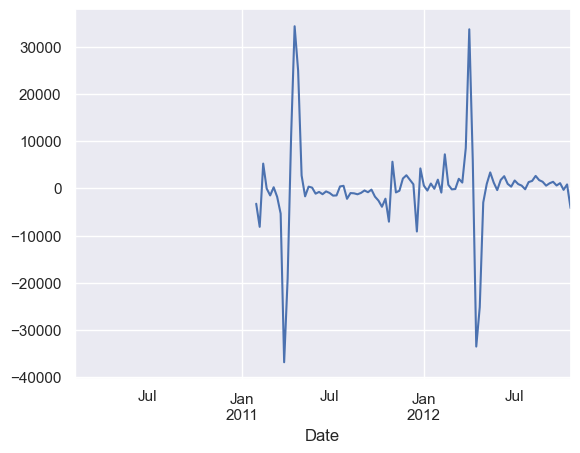

In [31]:
d1['Seasonal First Difference'].plot()

# Checking ACF and PACF Graphs
Choosing the no. of lags from ACF and PACF charts for the Seasonal Data

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


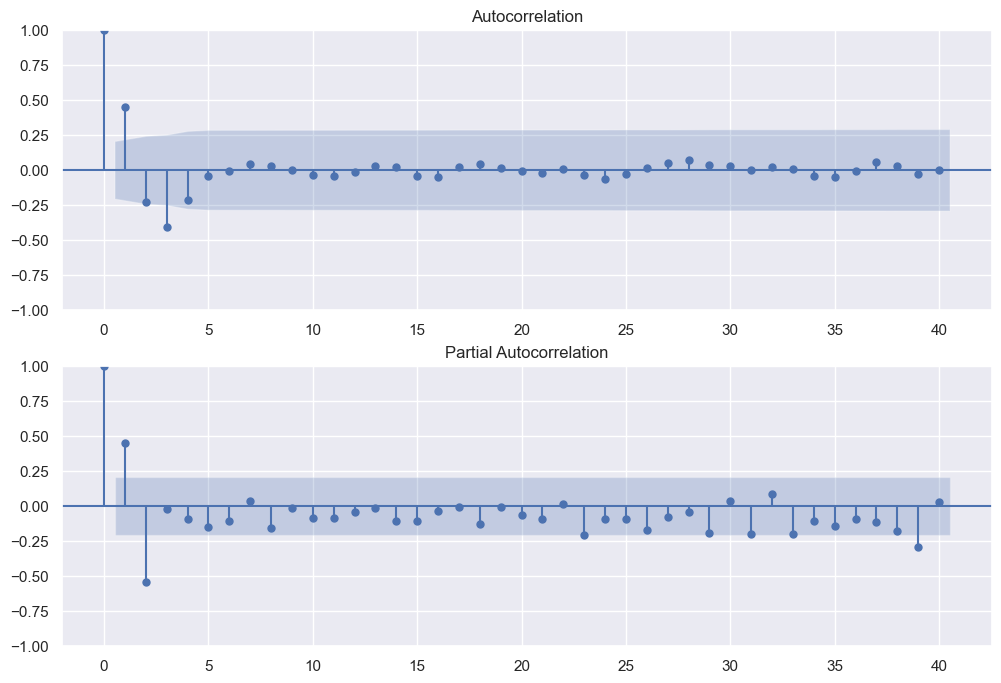

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d1['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(d1['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

## Function to Find Integration Order (d)

In [33]:
def find_integration_order(data, column_name='value', significance_level=0.05):
    """
    Find the integration order (d) for a time series using the Augmented Dickey-Fuller (ADF) test.

    Parameters:
    - data: A pandas DataFrame containing the time series data.
    - column_name: The name of the column in the DataFrame that contains the time series values.
    - significance_level: The significance level for the ADF test (default is 0.05).

    Returns:
    - The integration order (d).
    """

    # Extract the time series values
    time_series = data[column_name]

    # Initialize d
    d = 0

    # Perform the ADF test iteratively until the data becomes stationary
    while True:
        result = sm.tsa.adfuller(time_series)
        adf_statistic, p_value, _, _, _, _ = result

        # Check if the data is stationary or if p-value is less than significance level
        if p_value <= significance_level:
            break

        # If not stationary, difference the data and increment d
        time_series = time_series.diff().dropna()
        d += 1

    return d

dd = find_integration_order(d1,'Weekly_Sales')
print(dd)

1


## Function to Find Seasonal Integration Order (D)

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def find_seasonal_integration_order(data, column_name='value', seasonal_period=12, significance_level=0.05):
    """
    Find the seasonal integration order (D) for a time series using the Augmented Dickey-Fuller (ADF) test.

    Parameters:
    - data: A pandas DataFrame containing the time series data.
    - column_name: The name of the column in the DataFrame that contains the time series values.
    - seasonal_period: The seasonal period of the time series (e.g., 12 for monthly data).
    - significance_level: The significance level for the ADF test (default is 0.05).

    Returns:
    - The seasonal integration order (D).
    """

    # Extract the time series values
    time_series = data[column_name]

    # Initialize D
    D = 0

    # Perform the ADF test iteratively until the data becomes seasonally stationary
    while True:
        result = sm.tsa.adfuller(time_series.diff(seasonal_period).dropna())
        adf_statistic, p_value, _, _, _, _ = result

        # Check if the data is seasonally stationary or if p-value is less than significance level
        if p_value <= significance_level:
            break

        # If not seasonally stationary, difference the data seasonally and increment D
        time_series = time_series.diff(seasonal_period).dropna()
        D += 1

    return D

ds = find_seasonal_integration_order(d1, 'Weekly_Sales', 52)
print (ds)

0


# SARIMA Model

SARIMA includes the seasonal components into the ARIMA model making it the most suited for Seasonal Data Set.

sarima_model = sm.tsa.SARIMAX(data['Column Name'].order=(p, d, q), seasonal_order=(P, D, Q, s))

**It has 7 components which are:** <br>
p: Autoregressive (AR) order <br>
d: Integration (I) order <br>
q: Moving Average (MA) order <br>
P: Seasonal AR order <br>
D: Seasonal Integration order <br>
Q: Seasonal MA order <br>
s: Seasonal period (e.g., 12 for monthly data) <br>

These values can be found found from ACF and PACF Graphs and the model can be fine tuned with a bit of trial and error.

In [35]:
model=sm.tsa.statespace.SARIMAX(d1['Weekly_Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,52))
results=model.fit()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\305351698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Forecast']=results.predict(start=120,end=142,dynamic=True)


<Axes: xlabel='Date'>

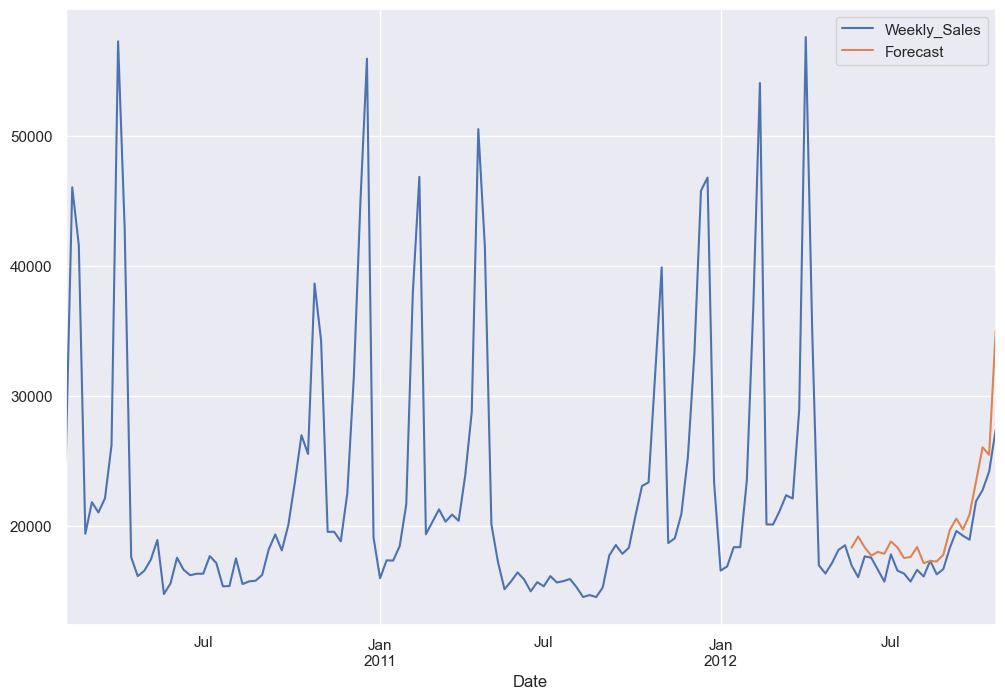

In [36]:
d1['Forecast']=results.predict(start=120,end=142,dynamic=True)
d1[['Weekly_Sales','Forecast']].plot(figsize=(12,8))

## Adding More Dates in the index to Forecast Future Sales

In [37]:
from pandas.tseries.offsets import DateOffset
future_dates=[d1.index[-1]+ DateOffset(weeks=x)for x in range(0,30)]

In [38]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=d1.columns)

In [39]:
future_datest_df.tail(14)

,Weekly_Sales,Sales First Difference,Seasonal First Difference,Forecast
2013-02-15,NaN,NaN,NaN,NaN
2013-02-22,NaN,NaN,NaN,NaN
2013-03-01,NaN,NaN,NaN,NaN
2013-03-08,NaN,NaN,NaN,NaN
2013-03-15,NaN,NaN,NaN,NaN
2013-03-22,NaN,NaN,NaN,NaN
2013-03-29,NaN,NaN,NaN,NaN
2013-04-05,NaN,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN,NaN
2013-04-19,NaN,NaN,NaN,NaN


In [40]:
future_d1=pd.concat([d1,future_datest_df])
future_d1.tail()

,Weekly_Sales,Sales First Difference,Seasonal First Difference,Forecast
2013-04-19,NaN,NaN,NaN,NaN
2013-04-26,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN
2013-05-10,NaN,NaN,NaN,NaN
2013-05-17,NaN,NaN,NaN,NaN


# Forecasting Sales

<Axes: >

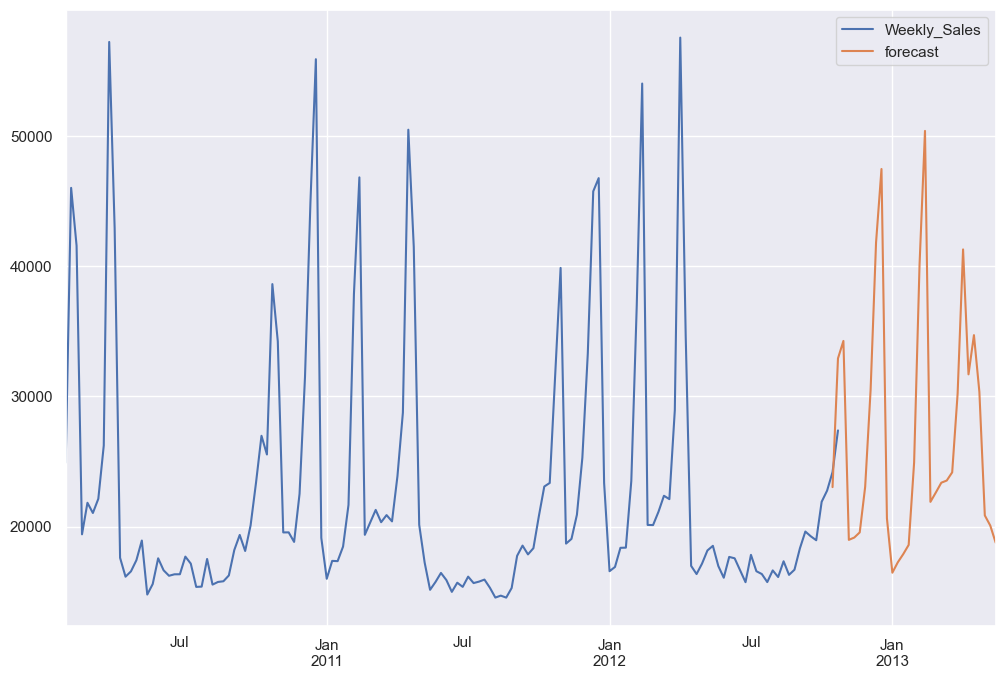

In [41]:
future_d1['forecast'] = results.predict(start = 141, end = 171, dynamic= True)  
future_d1[['Weekly_Sales', 'forecast']].plot(figsize=(12, 8)) 

Checking the Forecasted Data


In [42]:
print(future_d1['forecast'][139:153])

2012-10-05             NaN
2012-10-12             NaN
2012-10-19    23031.953810
2012-10-26    32929.008339
2012-11-02    34269.068461
2012-11-09    18976.867705
2012-11-16    19154.986393
2012-11-23    19552.454946
2012-11-30    23053.992272
2012-12-07    30507.221534
2012-12-14    41829.696852
2012-12-21    47490.197993
2012-12-28    20635.141094
2013-01-04    16451.790844
Name: forecast, dtype: float64


# Analysing the Data and Forecasting for Department 2

**Plotting Department 2 Data** <br>
Plotting the Weekly sales of Department 2 with Markers to check for patterns and trends

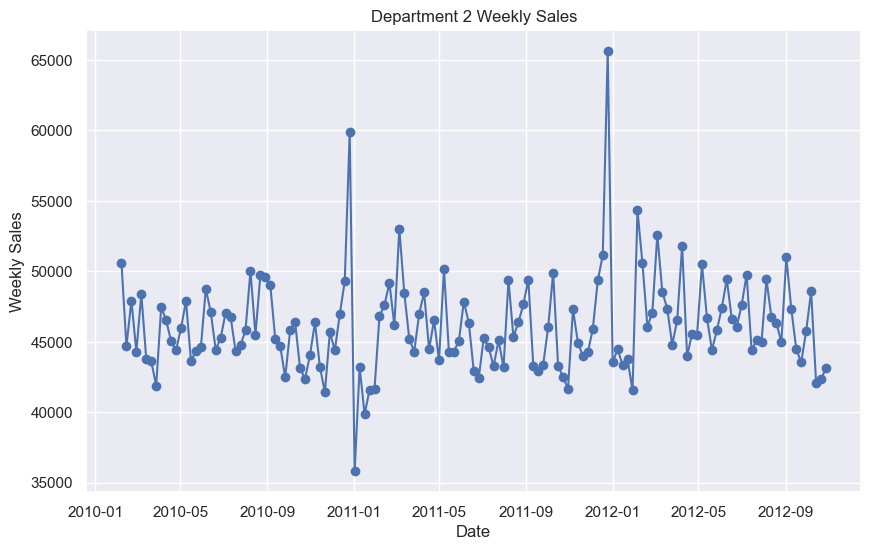

In [43]:
weekly_data = d2.resample('W').sum()
plt.figure(figsize=(10,6))
plt.plot(weekly_data.index, weekly_data['Weekly_Sales'], marker='o',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Department 2 Weekly Sales')
plt.show()

## ACF and PACF Plots

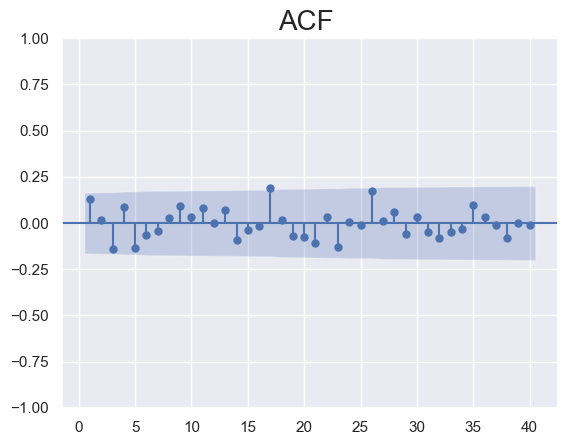

In [44]:
plot_acf(d2.Weekly_Sales, zero = False, lags = 40)
plt.title("ACF ", size = 20)
plt.show()

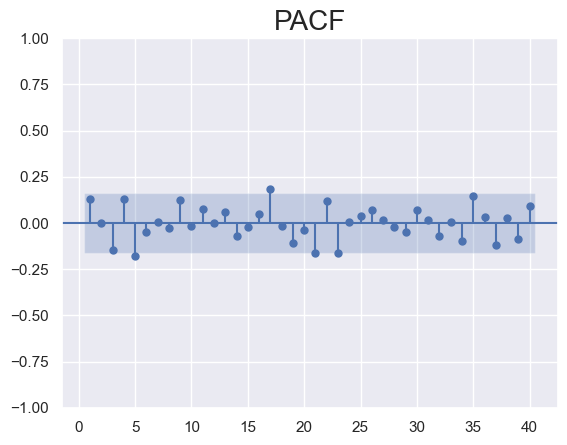

In [45]:
plot_pacf(d2.Weekly_Sales, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF", size = 20)
plt.show()

## Seasonal Decompose

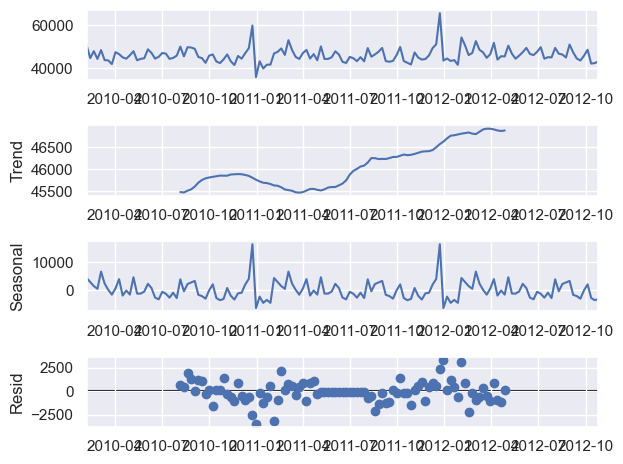

In [46]:
decompose_data = seasonal_decompose(d2, model="additive")
decompose_data.plot();

## Checking Stationarity of the Data Set

In [47]:
adfuller_test(d2['Weekly_Sales'])

ADF Test Statistic : -5.8140187793082925
p-value : 4.3346460273169563e-07
#Lags Used : 4
Number of Observations Used : 138
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Diffrencing

In [48]:
d2['Sales First Difference'] = d2['Weekly_Sales'] - d2['Weekly_Sales'].shift(1)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\4197516505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['Sales First Difference'] = d2['Weekly_Sales'] - d2['Weekly_Sales'].shift(1)


In [49]:
d2['Weekly_Sales'].shift(1)

Date
2010-02-05         NaN
2010-02-12    50605.27
2010-02-19    44682.74
2010-02-26    47928.89
2010-03-05    44292.87
                ...   
2012-09-28    43541.07
2012-10-05    45784.76
2012-10-12    48577.08
2012-10-19    42112.67
2012-10-26    42354.72
Name: Weekly_Sales, Length: 143, dtype: float64

In [50]:
d2['Seasonal First Difference']=d2['Weekly_Sales']-d2['Weekly_Sales'].shift(52)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\4194633057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['Seasonal First Difference']=d2['Weekly_Sales']-d2['Weekly_Sales'].shift(52)


In [51]:
d2.head(142)

,Weekly_Sales,Sales First Difference,Seasonal First Difference
Date,,,
2010-02-05,50605.27,NaN,NaN
2010-02-12,44682.74,-5922.53,NaN
2010-02-19,47928.89,3246.15,NaN
2010-02-26,44292.87,-3636.02,NaN
2010-03-05,48397.98,4105.11,NaN
...,...,...,...
2012-09-21,43541.07,-952.54,150.13
2012-09-28,45784.76,2243.69,-260.33
2012-10-05,48577.08,2792.32,-1303.61


In [52]:
## Again test dickey fuller test
adfuller_test(d2['Seasonal First Difference'].dropna())


ADF Test Statistic : -2.6772337525105576
p-value : 0.07806135423633517
#Lags Used : 6
Number of Observations Used : 84
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: xlabel='Date'>

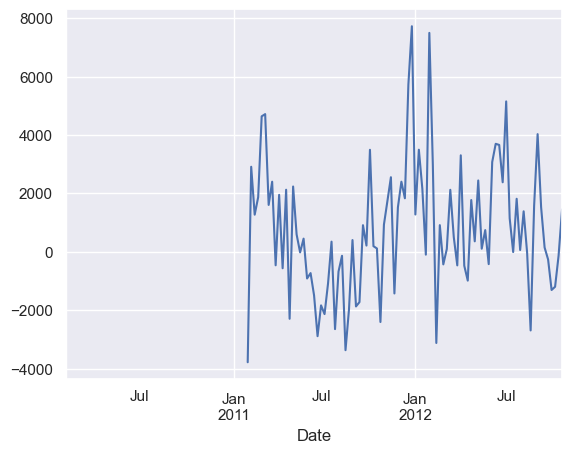

In [53]:
d2['Seasonal First Difference'].plot()

# Checking ACF and PACF Graphs

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


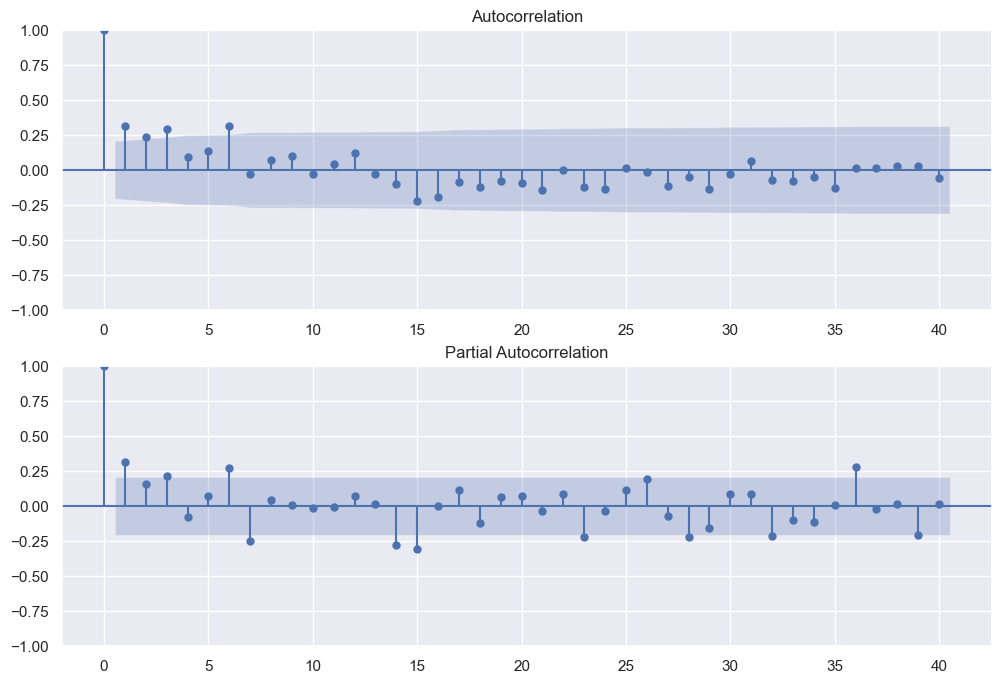

In [54]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d2['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(d2['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [55]:
dd = find_integration_order(d1,'Weekly_Sales')
print(dd)
ds = find_seasonal_integration_order(d1, 'Weekly_Sales', 52)
print (ds)

1
0


# Model

In [56]:
model=sm.tsa.statespace.SARIMAX(d2['Weekly_Sales'],order=(0, 0, 0),seasonal_order=(2,1,4,52))
results=model.fit()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1748283570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['Forecast']=results.predict(start=120,end=142,dynamic=True)


<Axes: xlabel='Date'>

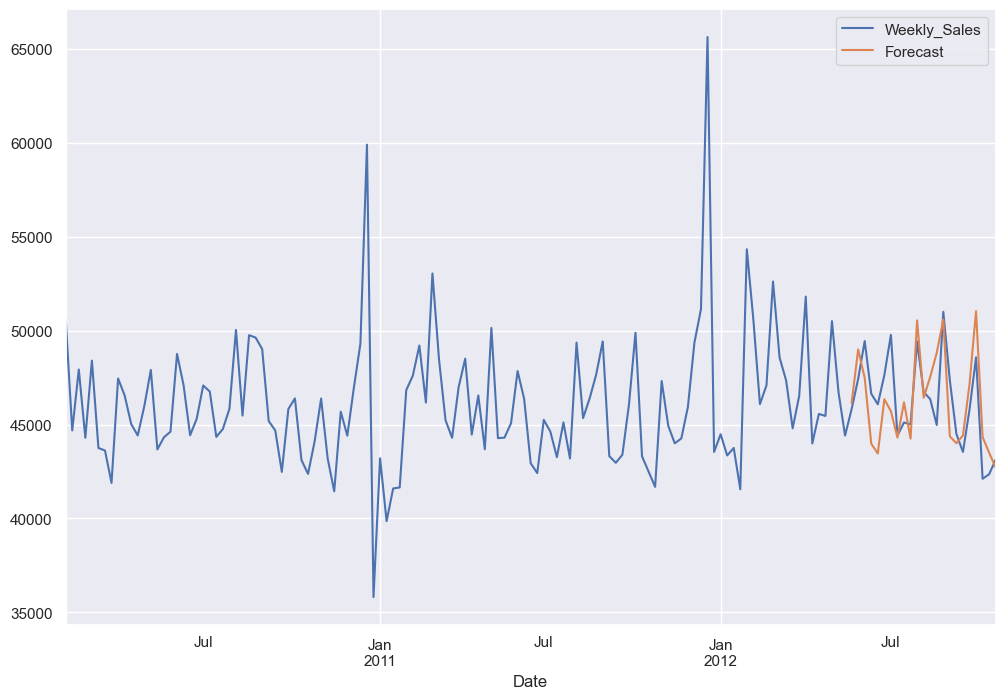

In [57]:
d2['Forecast']=results.predict(start=120,end=142,dynamic=True)
d2[['Weekly_Sales','Forecast']].plot(figsize=(12,8))

In [58]:
future_d2=pd.concat([d2,future_datest_df])
future_d2.tail()

,Weekly_Sales,Sales First Difference,Seasonal First Difference,Forecast
2013-04-19,NaN,NaN,NaN,NaN
2013-04-26,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN
2013-05-10,NaN,NaN,NaN,NaN
2013-05-17,NaN,NaN,NaN,NaN


<Axes: >

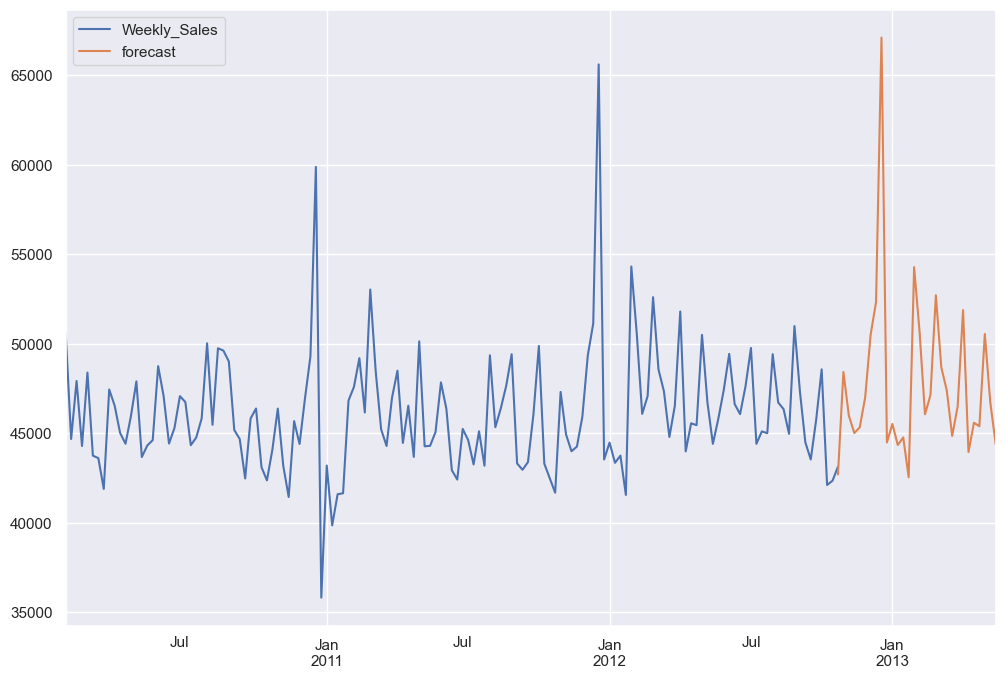

In [59]:
future_d2['forecast'] = results.predict(start = 142, end = 171, dynamic= True)  
future_d2[['Weekly_Sales', 'forecast']].plot(figsize=(12, 8)) 

In [60]:
print(future_d2['forecast'][139:])

2012-10-05             NaN
2012-10-12             NaN
2012-10-19             NaN
2012-10-26    42701.391145
2012-11-02    48430.094393
2012-11-09    45987.433398
2012-11-16    45017.457401
2012-11-23    45329.219259
2012-11-30    47005.124790
2012-12-07    50506.422562
2012-12-14    52335.039096
2012-12-21    67114.972732
2012-12-28    44491.930706
2013-01-04    45526.594348
2013-01-11    44347.068917
2013-01-18    44771.664564
2013-01-25    42546.887685
2013-02-01    54289.566475
2013-02-08    50685.444388
2013-02-15    46063.541690
2013-02-22    47128.311981
2013-03-01    52717.458773
2013-03-08    48683.349437
2013-03-15    47402.580118
2013-03-22    44855.092007
2013-03-29    46492.038017
2013-04-05    51885.985101
2013-04-12    43951.423473
2013-04-19    45593.069452
2013-04-26    45395.102450
2013-05-03    50551.493450
2013-05-10    46749.090820
2013-05-17    44394.806227
Name: forecast, dtype: float64


# Analysing the Data and Forecasting for Department 3

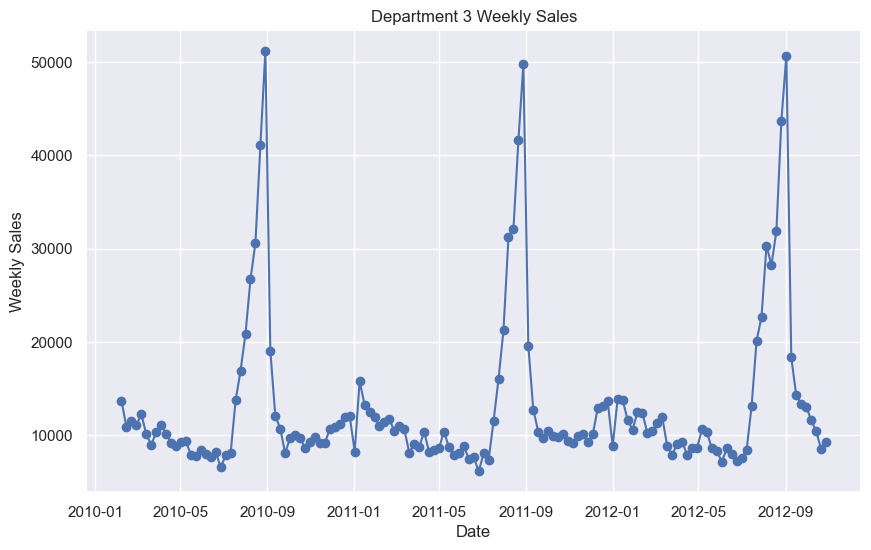

In [62]:
weekly_data = d3.resample('W').sum()
# wtf is this line doing
plt.figure(figsize=(10,6))
plt.plot(weekly_data.index, weekly_data['Weekly_Sales'], marker='o',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Department 3 Weekly Sales')
plt.show()

## ACF and PACF Plots

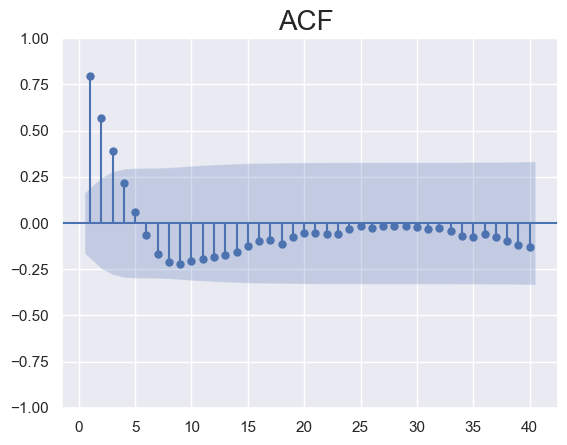

In [63]:
plot_acf(d3.Weekly_Sales, zero = False, lags = 40)
plt.title("ACF ", size = 20)
plt.show()

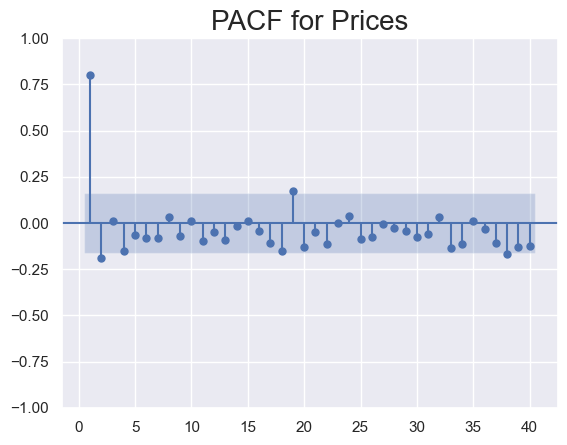

In [64]:
plot_pacf(d3.Weekly_Sales, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## Seasonal Decompose

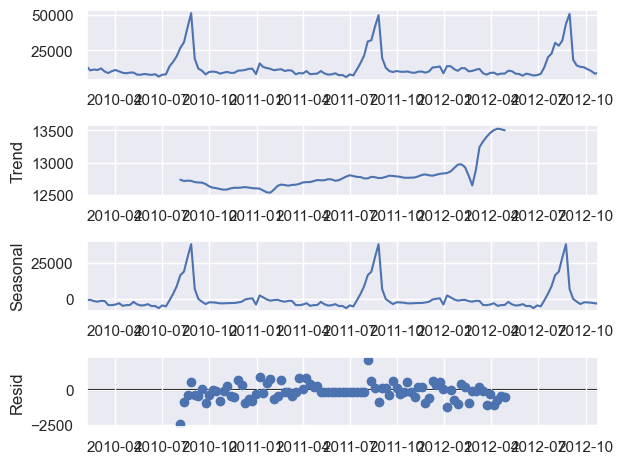

In [65]:
decompose_data = seasonal_decompose(d3,model="additive")
decompose_data.plot();

## Checking Stationarity of the Data Set

In [66]:
adfuller_test(d3['Weekly_Sales'])

ADF Test Statistic : -4.506652250219247
p-value : 0.00019126853667076458
#Lags Used : 1
Number of Observations Used : 141
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Diffrencing

In [67]:
d3['Sales First Difference'] = d3['Weekly_Sales'] - d3['Weekly_Sales'].shift(1)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\3485984324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['Sales First Difference'] = d3['Weekly_Sales'] - d3['Weekly_Sales'].shift(1)


In [68]:
d3['Weekly_Sales'].shift(1)

Date
2010-02-05         NaN
2010-02-12    13740.12
2010-02-19    10887.84
2010-02-26    11523.47
2010-03-05    11135.17
                ...   
2012-09-28    13403.63
2012-10-05    13085.95
2012-10-12    11676.98
2012-10-19    10487.17
2012-10-26     8548.87
Name: Weekly_Sales, Length: 143, dtype: float64

In [69]:
d3['Seasonal First Difference']=d3['Weekly_Sales']-d3['Weekly_Sales'].shift(52)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1005653741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['Seasonal First Difference']=d3['Weekly_Sales']-d3['Weekly_Sales'].shift(52)


In [70]:
d3.head(142)

,Weekly_Sales,Sales First Difference,Seasonal First Difference
Date,,,
2010-02-05,13740.12,NaN,NaN
2010-02-12,10887.84,-2852.28,NaN
2010-02-19,11523.47,635.63,NaN
2010-02-26,11135.17,-388.30,NaN
2010-03-05,12275.58,1140.41,NaN
...,...,...,...
2012-09-21,13403.63,-884.59,3648.07
2012-09-28,13085.95,-317.68,2651.12
2012-10-05,11676.98,-1408.97,1699.02


In [71]:
## Again test dickey fuller test
adfuller_test(d3['Seasonal First Difference'].dropna())


ADF Test Statistic : -7.2135747351709085
p-value : 2.2025716478688838e-10
#Lags Used : 1
Number of Observations Used : 89
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

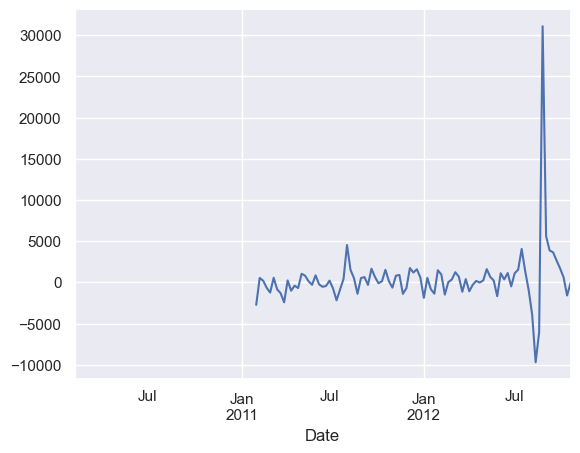

In [72]:
d3['Seasonal First Difference'].plot()

# Checking ACF and PACF Graphs

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


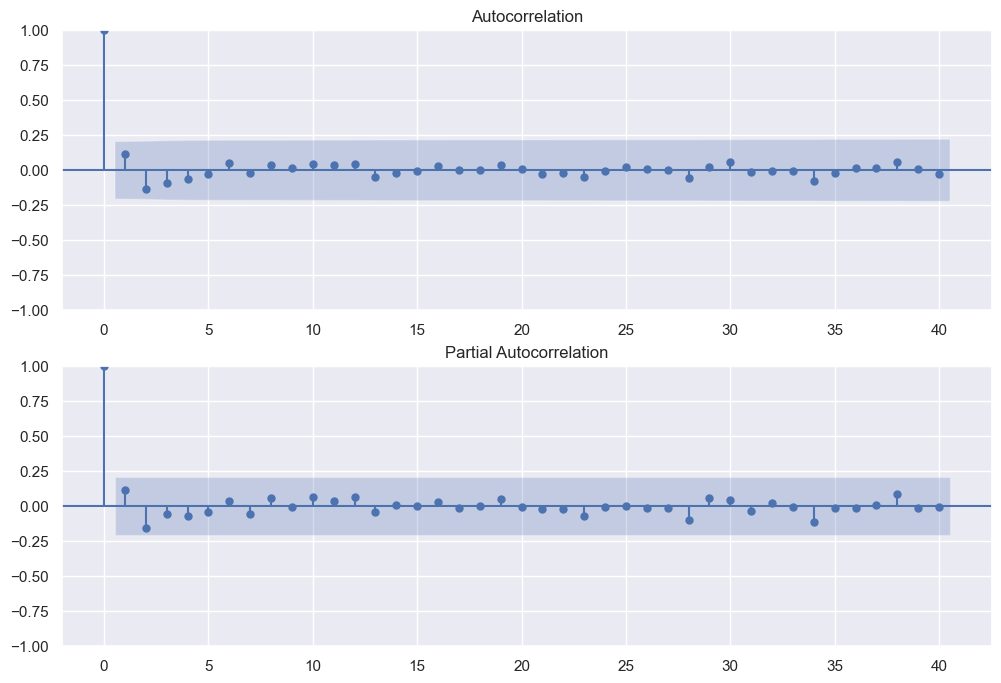

In [73]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d3['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(d3['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

# Model

In [74]:
model=sm.tsa.statespace.SARIMAX(d3['Weekly_Sales'],order=(2, 1, 4),seasonal_order=(1,1,1,52))
results=model.fit()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\2482978557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['Forecast']=results.predict(start=120,end=142,dynamic=True)


<Axes: xlabel='Date'>

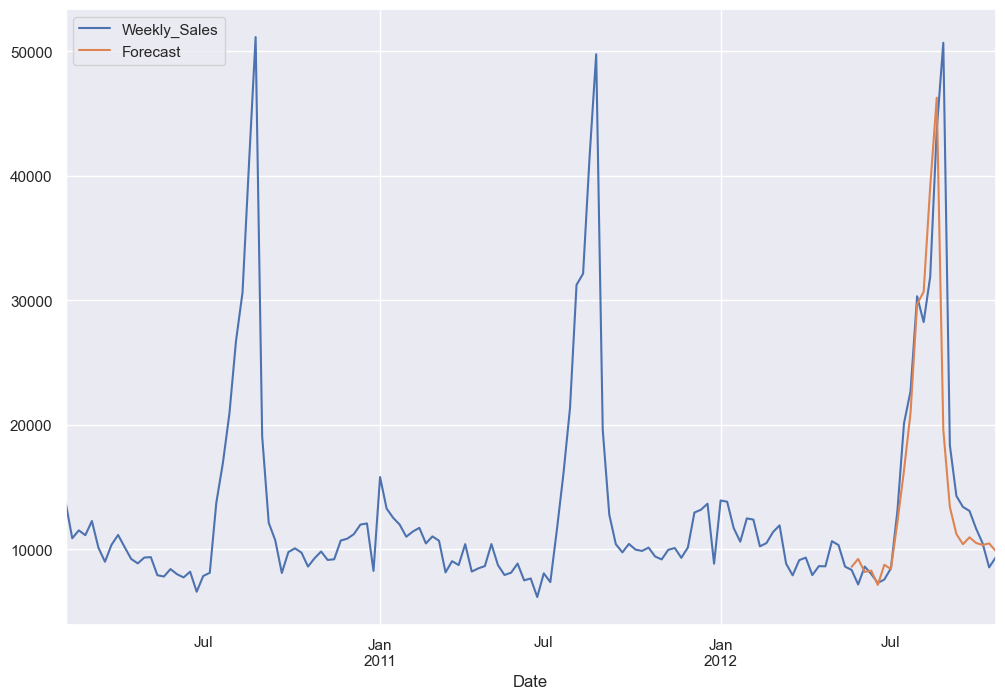

In [75]:
d3['Forecast']=results.predict(start=120,end=142,dynamic=True)
d3[['Weekly_Sales','Forecast']].plot(figsize=(12,8))

In [76]:
future_d3=pd.concat([d3,future_datest_df])
future_d3.tail()

,Weekly_Sales,Sales First Difference,Seasonal First Difference,Forecast
2013-04-19,NaN,NaN,NaN,NaN
2013-04-26,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN
2013-05-10,NaN,NaN,NaN,NaN
2013-05-17,NaN,NaN,NaN,NaN


<Axes: >

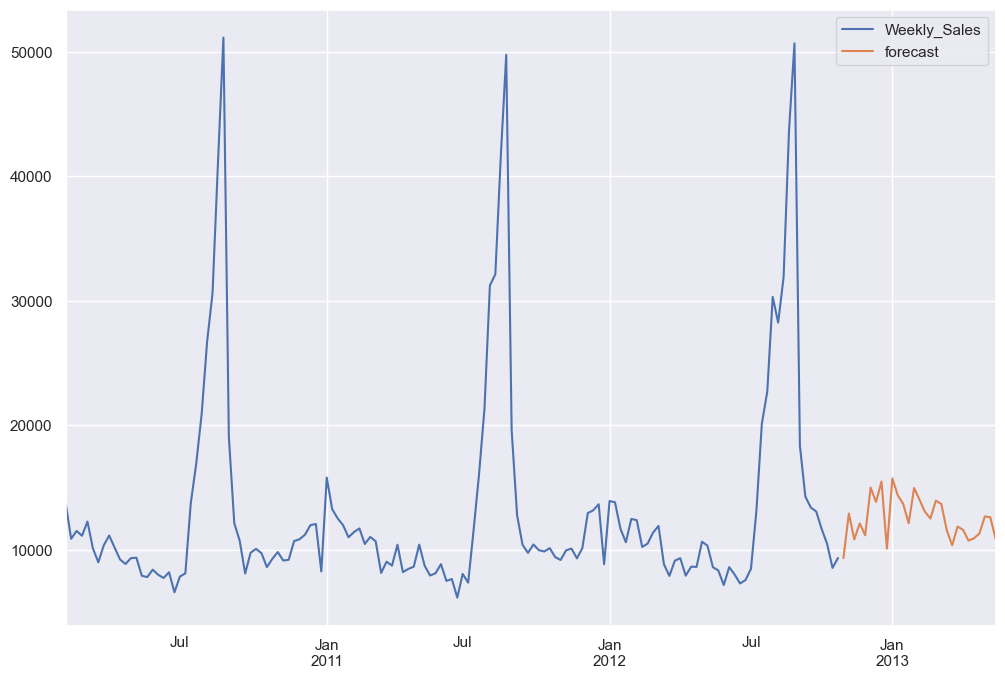

In [77]:
future_d3['forecast'] = results.predict(start = 143, end = 171, dynamic= True)  
future_d3[['Weekly_Sales', 'forecast']].plot(figsize=(12, 8)) 

In [78]:
print(future_d3['forecast'][139:])

2012-10-05             NaN
2012-10-12             NaN
2012-10-19             NaN
2012-10-26             NaN
2012-11-02     9339.477471
2012-11-09    12922.371586
2012-11-16    10844.973994
2012-11-23    12131.542774
2012-11-30    11170.223424
2012-12-07    15004.642498
2012-12-14    13851.809250
2012-12-21    15495.323952
2012-12-28    10107.014397
2013-01-04    15746.823350
2013-01-11    14383.006056
2013-01-18    13684.621937
2013-01-25    12134.434508
2013-02-01    14975.756780
2013-02-08    14017.281625
2013-02-15    13058.310519
2013-02-22    12516.866862
2013-03-01    13958.685430
2013-03-08    13688.110042
2013-03-15    11584.289324
2013-03-22    10376.291681
2013-03-29    11876.938772
2013-04-05    11607.647688
2013-04-12    10750.862428
2013-04-19    10929.783135
2013-04-26    11312.716021
2013-05-03    12686.160182
2013-05-10    12628.054888
2013-05-17    10879.409155
Name: forecast, dtype: float64


# Analysing the Data and Forecasting for Department 4

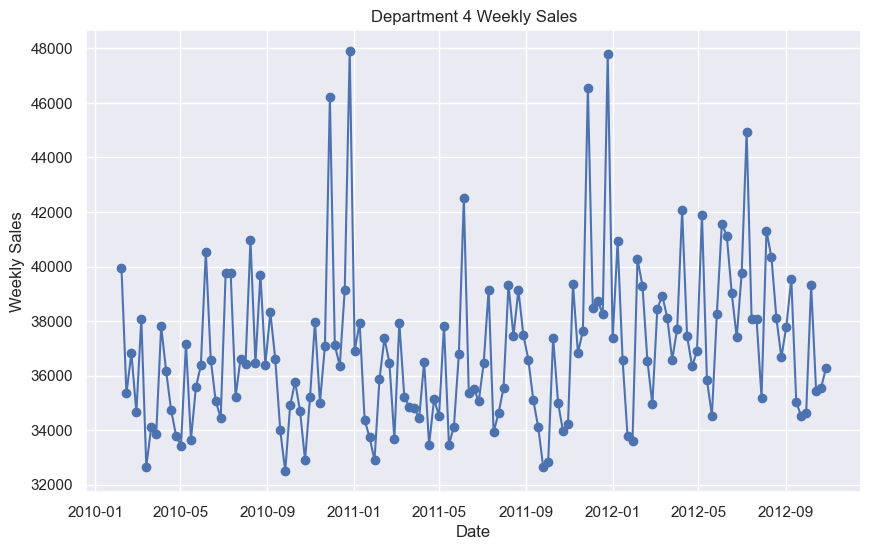

In [80]:
weekly_data = d4.resample('W').sum()
# wtf is this line doing
plt.figure(figsize=(10,6))
plt.plot(weekly_data.index, weekly_data['Weekly_Sales'], marker='o',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Department 4 Weekly Sales')
plt.show()

## ACF and PACF Plots

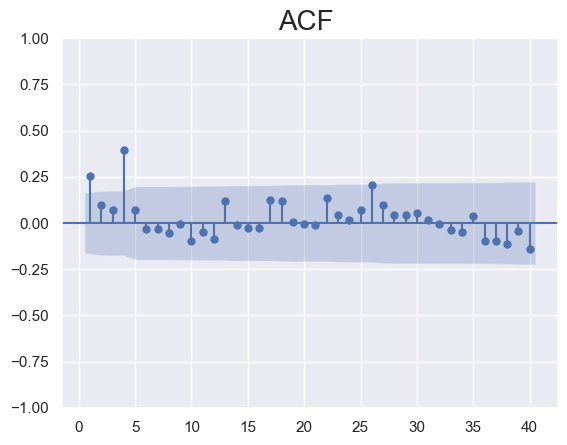

In [81]:
plot_acf(d4.Weekly_Sales, zero = False, lags = 40)
plt.title("ACF ", size = 20)
plt.show()

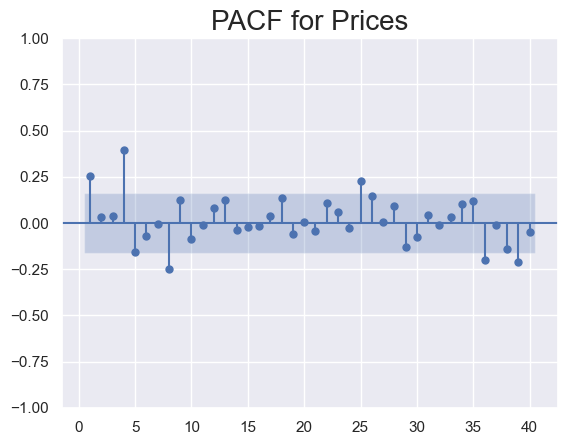

In [82]:
plot_pacf(d4.Weekly_Sales, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## Seasonal Decompose

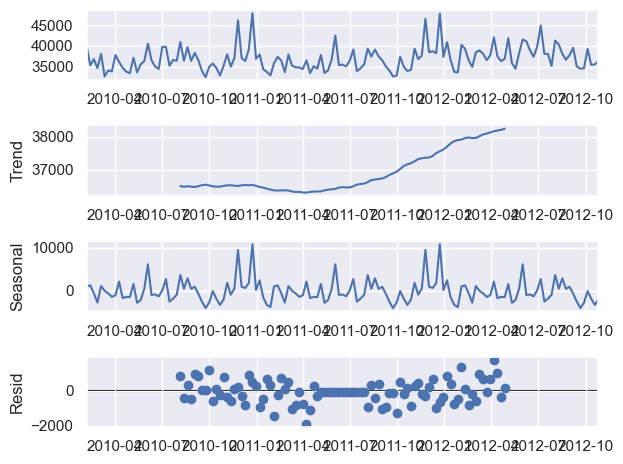

In [83]:
decompose_data = seasonal_decompose(d4,model="additive")
decompose_data.plot();

## Checking Stationarity of the Data Set

In [84]:
adfuller_test(d4['Weekly_Sales'])

ADF Test Statistic : -4.43102574281505
p-value : 0.0002614709444425517
#Lags Used : 7
Number of Observations Used : 135
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Diffrencing

In [85]:
d4['Sales First Difference'] = d4['Weekly_Sales'] - d4['Weekly_Sales'].shift(1)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1657084677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4['Sales First Difference'] = d4['Weekly_Sales'] - d4['Weekly_Sales'].shift(1)


In [86]:
d4['Weekly_Sales'].shift(1)

Date
2010-02-05         NaN
2010-02-12    39954.04
2010-02-19    35351.21
2010-02-26    36826.95
2010-03-05    34660.16
                ...   
2012-09-28    34507.34
2012-10-05    34647.33
2012-10-12    39311.93
2012-10-19    35446.18
2012-10-26    35549.19
Name: Weekly_Sales, Length: 143, dtype: float64

In [87]:
d4['Seasonal First Difference']=d4['Weekly_Sales']-d4['Weekly_Sales'].shift(52)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\3985481878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4['Seasonal First Difference']=d4['Weekly_Sales']-d4['Weekly_Sales'].shift(52)


In [88]:
d4.head(142)

,Weekly_Sales,Sales First Difference,Seasonal First Difference
Date,,,
2010-02-05,39954.04,NaN,NaN
2010-02-12,35351.21,-4602.83,NaN
2010-02-19,36826.95,1475.74,NaN
2010-02-26,34660.16,-2166.79,NaN
2010-03-05,38086.19,3426.03,NaN
...,...,...,...
2012-09-21,34507.34,-536.72,1852.27
2012-09-28,34647.33,139.99,1816.52
2012-10-05,39311.93,4664.60,1914.30


In [89]:
## Again test dickey fuller test
adfuller_test(d4['Seasonal First Difference'].dropna())


ADF Test Statistic : -2.2706800092227013
p-value : 0.18159865635338507
#Lags Used : 3
Number of Observations Used : 87
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: xlabel='Date'>

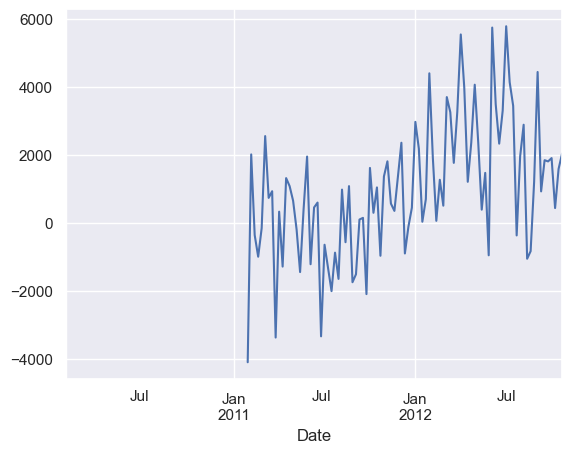

In [90]:
d4['Seasonal First Difference'].plot()

# Checking ACF and PACF Graphs

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


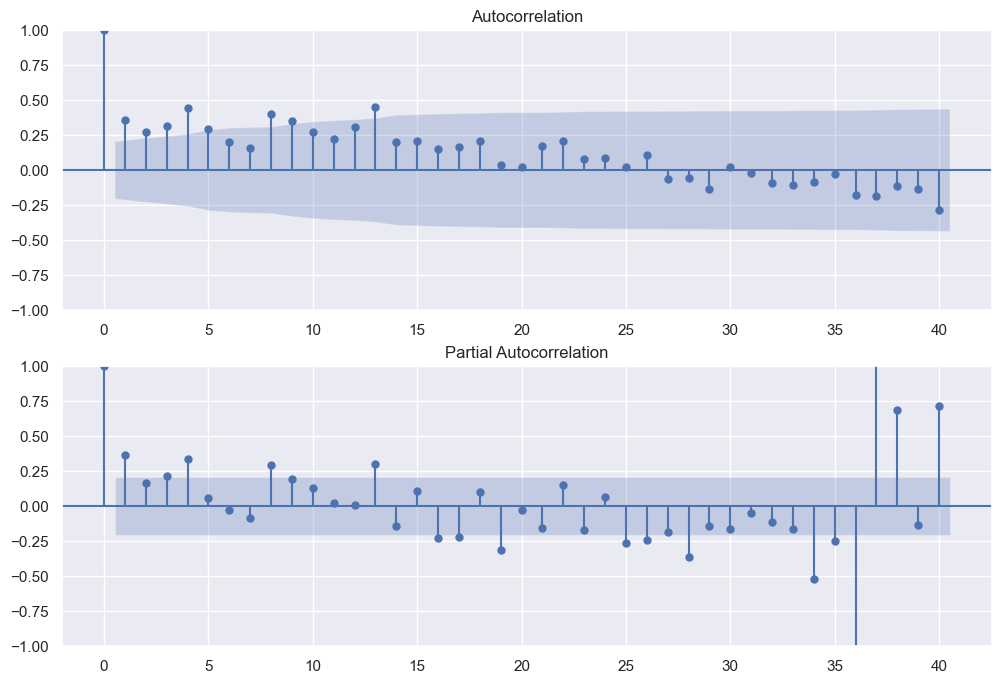

In [91]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d4['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(d4['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

# Model

In [92]:
model=sm.tsa.statespace.SARIMAX(d4['Weekly_Sales'],order=(4, 0, 4),seasonal_order=(1,1,1,52))
results=model.fit()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\1334195814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4['Forecast']=results.predict(start=120,end=142,dynamic=True)


<Axes: xlabel='Date'>

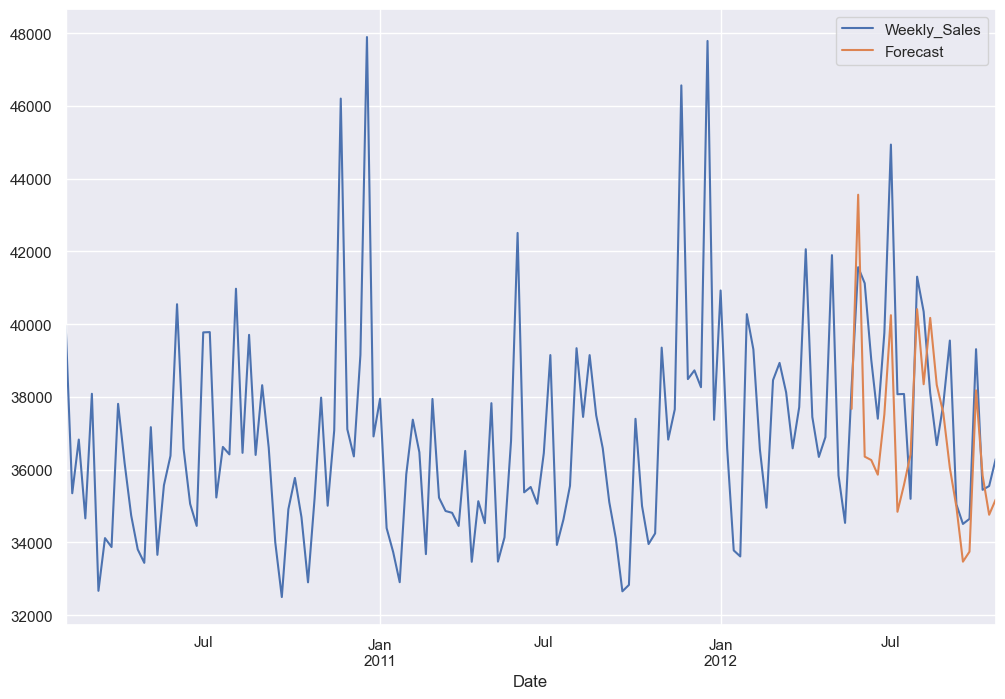

In [93]:
d4['Forecast']=results.predict(start=120,end=142,dynamic=True)
d4[['Weekly_Sales','Forecast']].plot(figsize=(12,8))

In [94]:
future_d4=pd.concat([d4,future_datest_df])
future_d4.tail()

,Weekly_Sales,Sales First Difference,Seasonal First Difference,Forecast
2013-04-19,NaN,NaN,NaN,NaN
2013-04-26,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN
2013-05-10,NaN,NaN,NaN,NaN
2013-05-17,NaN,NaN,NaN,NaN


<Axes: >

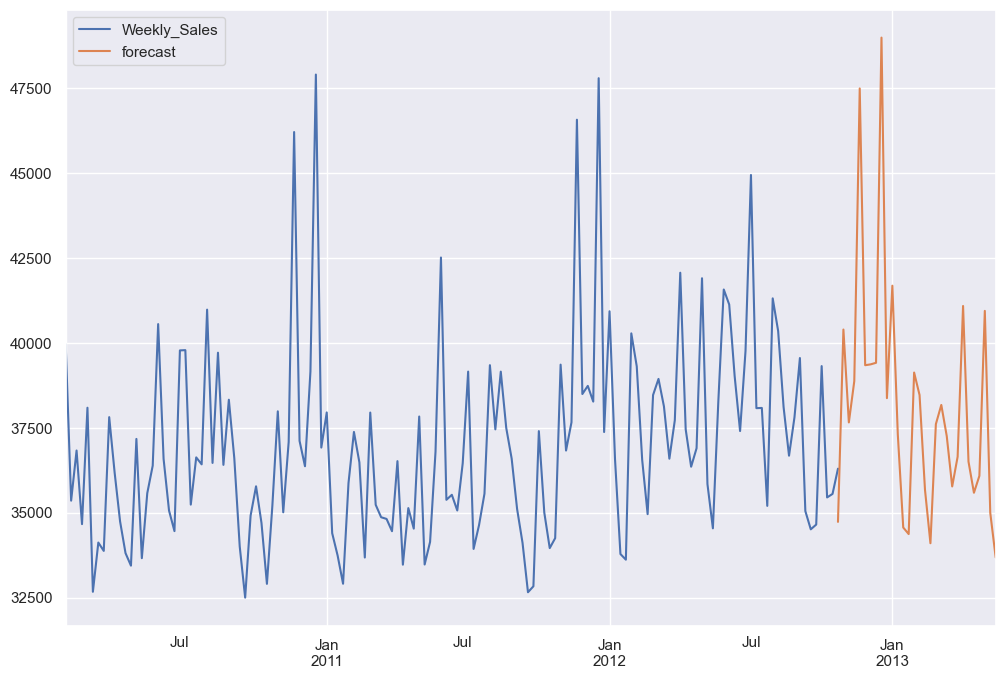

In [95]:
future_d4['forecast'] = results.predict(start = 142, end = 171, dynamic= True)  
future_d4[['Weekly_Sales', 'forecast']].plot(figsize=(12, 8)) 

In [96]:
print(future_d4['forecast'][139:])

2012-10-05             NaN
2012-10-12             NaN
2012-10-19             NaN
2012-10-26    34726.277702
2012-11-02    40387.950066
2012-11-09    37653.895434
2012-11-16    38871.030116
2012-11-23    47484.322101
2012-11-30    39337.664975
2012-12-07    39362.877051
2012-12-14    39408.954128
2012-12-21    48980.848505
2012-12-28    38368.338192
2013-01-04    41678.402633
2013-01-11    37302.206816
2013-01-18    34560.827559
2013-01-25    34367.412453
2013-02-01    39121.676610
2013-02-08    38460.650191
2013-02-15    35669.495482
2013-02-22    34097.942807
2013-03-01    37603.899208
2013-03-08    38168.192432
2013-03-15    37252.059694
2013-03-22    35769.759611
2013-03-29    36642.857499
2013-04-05    41081.494493
2013-04-12    36499.649245
2013-04-19    35583.594817
2013-04-26    36080.181491
2013-05-03    40936.943090
2013-05-10    34993.014991
2013-05-17    33678.596254
Name: forecast, dtype: float64


# Analysing the Data and Forecasting for Department 5

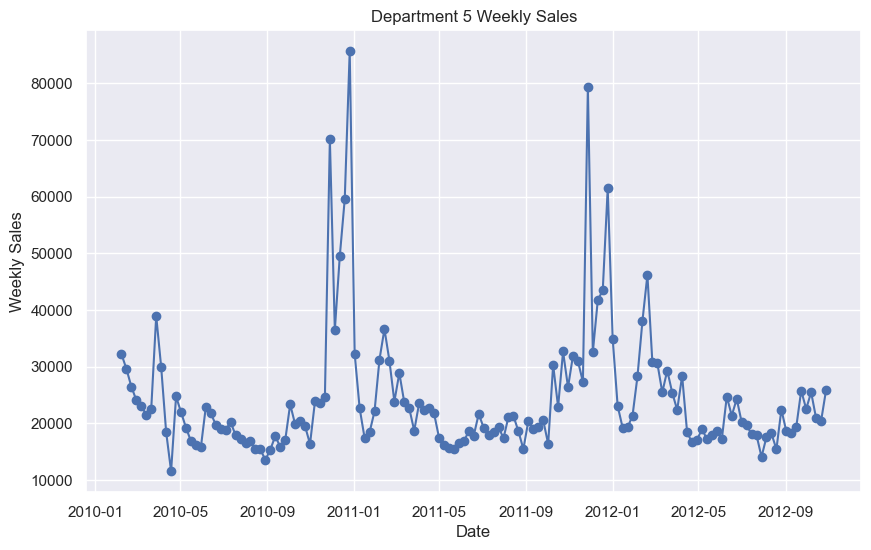

In [98]:
weekly_data = d5.resample('W').sum()
# wtf is this line doing
plt.figure(figsize=(10,6))
plt.plot(weekly_data.index, weekly_data['Weekly_Sales'], marker='o',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Department 5 Weekly Sales')
plt.show()

## ACF and PACF Plots

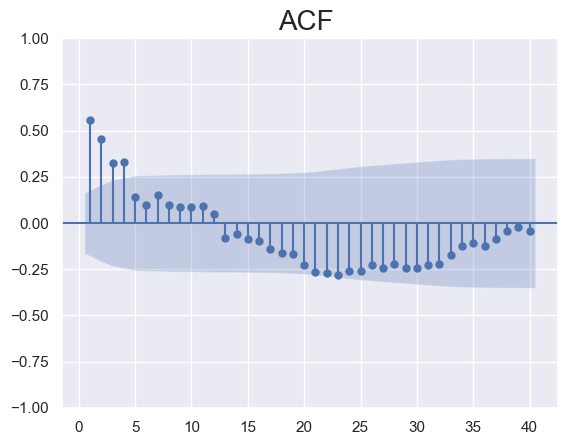

In [99]:
plot_acf(d5.Weekly_Sales, zero = False, lags = 40)
plt.title("ACF ", size = 20)
plt.show()

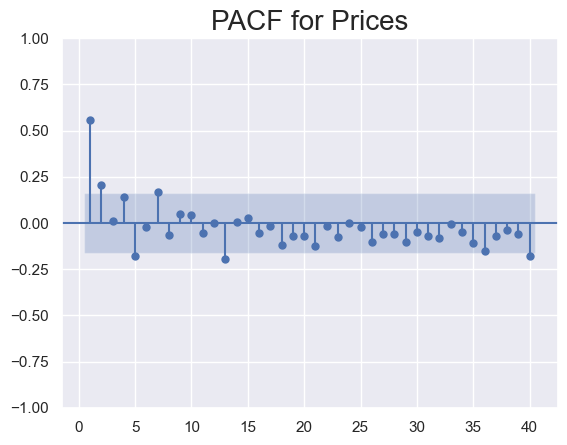

In [100]:
plot_pacf(d5.Weekly_Sales, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## Seasonal Decompose

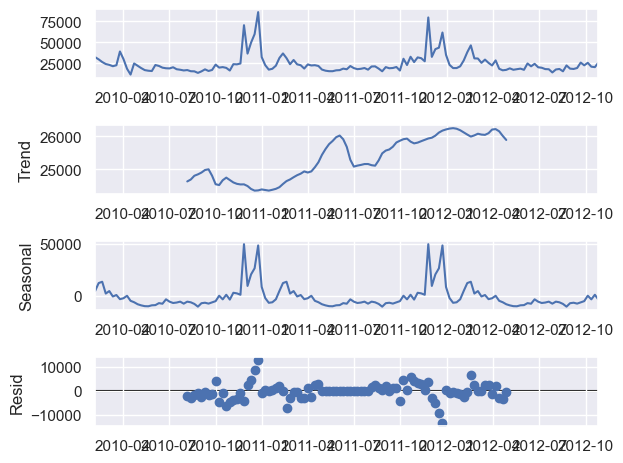

In [101]:
decompose_data = seasonal_decompose(d5,model="additive")
decompose_data.plot();

## Checking Stationarity of the Data Set

In [102]:
adfuller_test(d5['Weekly_Sales'])

ADF Test Statistic : -2.931913624622765
p-value : 0.04176075421044797
#Lags Used : 6
Number of Observations Used : 136
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Diffrencing

In [103]:
d5['Sales First Difference'] = d5['Weekly_Sales'] - d5['Weekly_Sales'].shift(1)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\2871363763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5['Sales First Difference'] = d5['Weekly_Sales'] - d5['Weekly_Sales'].shift(1)


In [104]:
d5['Weekly_Sales'].shift(1)

Date
2010-02-05         NaN
2010-02-12    32229.38
2010-02-19    29620.81
2010-02-26    26468.27
2010-03-05    24101.89
                ...   
2012-09-28    25798.78
2012-10-05    22560.39
2012-10-12    25508.81
2012-10-19    20920.03
2012-10-26    20413.83
Name: Weekly_Sales, Length: 143, dtype: float64

In [105]:
d5['Seasonal First Difference']=d5['Weekly_Sales']-d5['Weekly_Sales'].shift(52)

C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\3874066967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5['Seasonal First Difference']=d5['Weekly_Sales']-d5['Weekly_Sales'].shift(52)


In [106]:
d5.head(142)

,Weekly_Sales,Sales First Difference,Seasonal First Difference
Date,,,
2010-02-05,32229.38,NaN,NaN
2010-02-12,29620.81,-2608.57,NaN
2010-02-19,26468.27,-3152.54,NaN
2010-02-26,24101.89,-2366.38,NaN
2010-03-05,23082.14,-1019.75,NaN
...,...,...,...
2012-09-21,25798.78,6429.26,5236.41
2012-09-28,22560.39,-3238.39,6175.02
2012-10-05,25508.81,2948.42,-4843.25


In [107]:
## Again test dickey fuller test
adfuller_test(d5['Seasonal First Difference'].dropna())


ADF Test Statistic : -4.550030327167477
p-value : 0.00015951956614050457
#Lags Used : 7
Number of Observations Used : 83
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

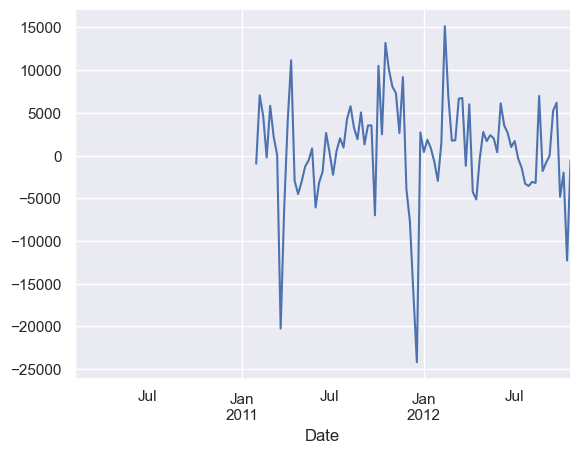

In [108]:
d5['Seasonal First Difference'].plot()

# Checking ACF and PACF Graphs

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


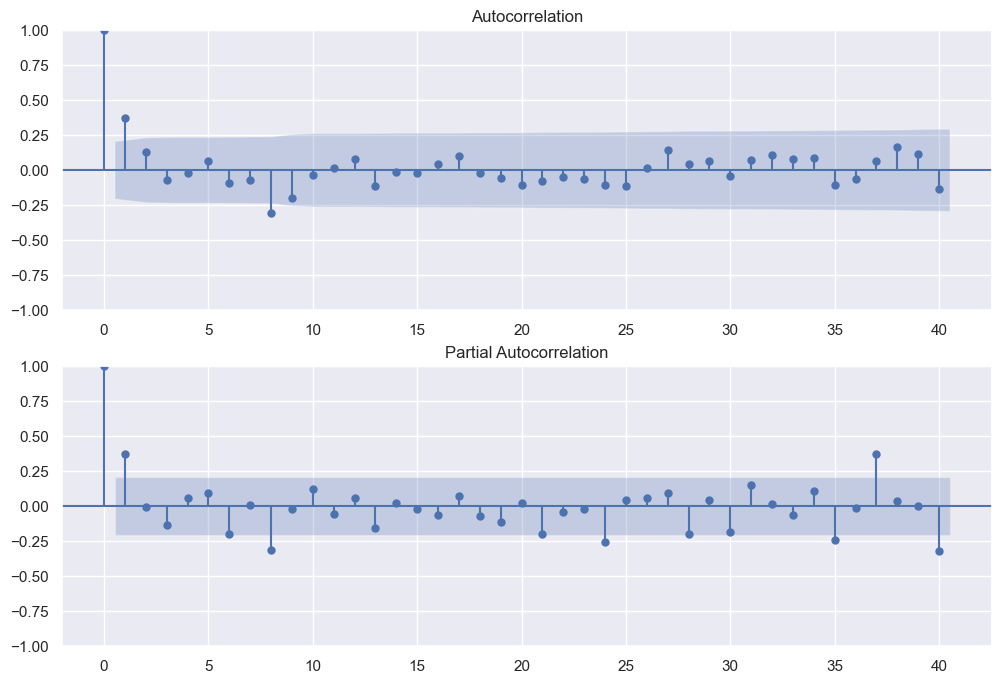

In [109]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d5['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(d5['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

# Model

In [110]:
model=sm.tsa.statespace.SARIMAX(d5['Weekly_Sales'],order=(5, 1, 4),seasonal_order=(1,1,1,52))
results=model.fit()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\sshre\AppData\Local\Temp\ipykernel_14836\2743590497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5['Forecast']=results.predict(start=120,end=142,dynamic=True)


<Axes: xlabel='Date'>

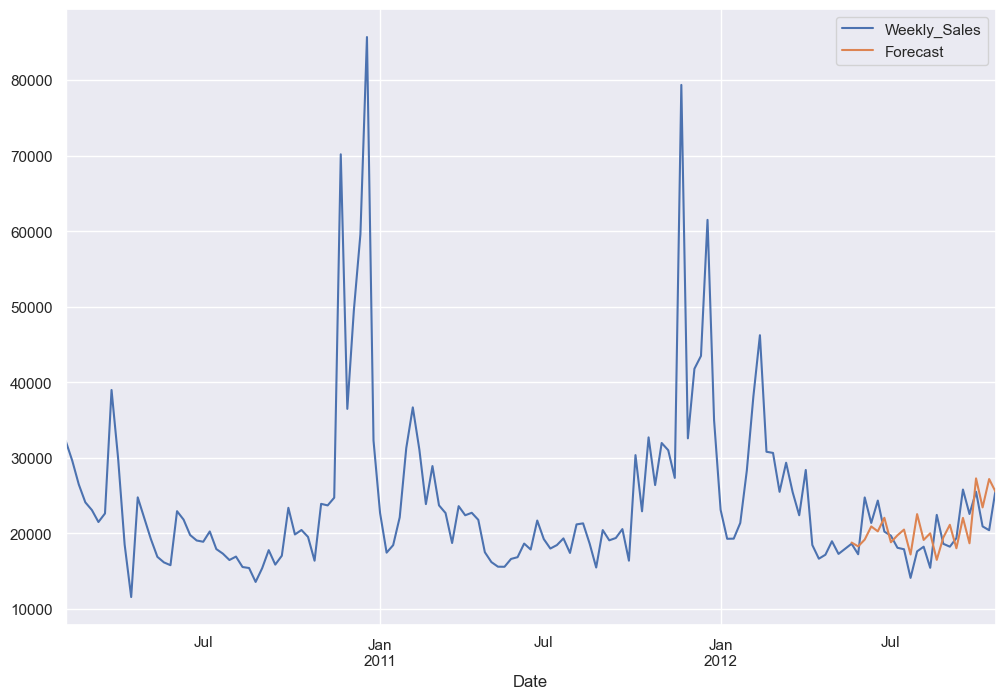

In [111]:
d5['Forecast']=results.predict(start=120,end=142,dynamic=True)
d5[['Weekly_Sales','Forecast']].plot(figsize=(12,8))

In [112]:
future_d5=pd.concat([d5,future_datest_df])
future_d5.tail()

,Weekly_Sales,Sales First Difference,Seasonal First Difference,Forecast
2013-04-19,NaN,NaN,NaN,NaN
2013-04-26,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN
2013-05-10,NaN,NaN,NaN,NaN
2013-05-17,NaN,NaN,NaN,NaN


<Axes: >

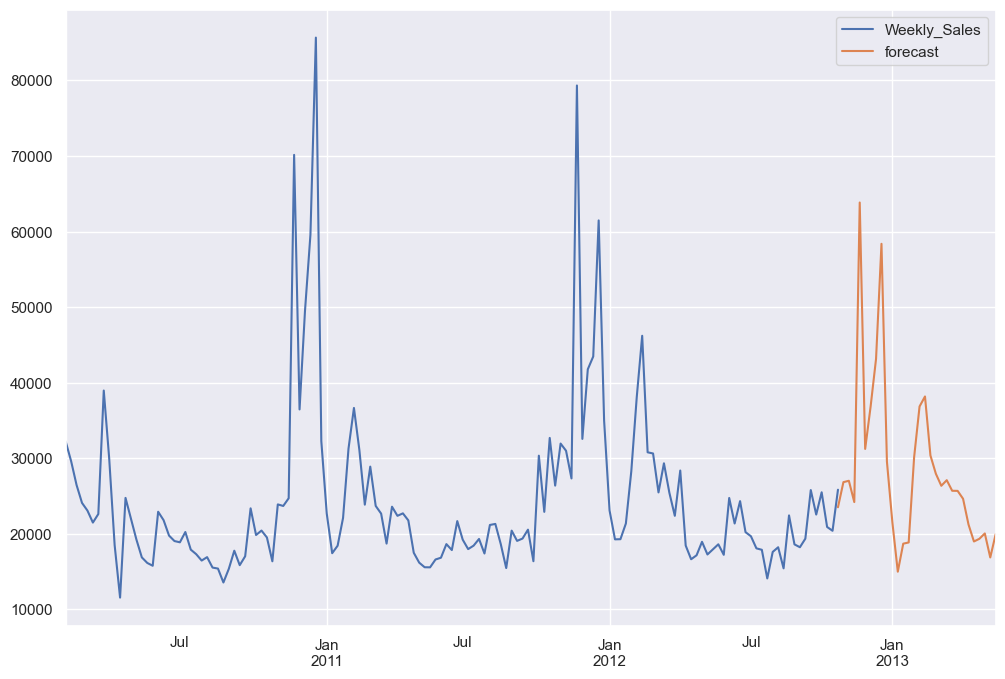

In [113]:
future_d5['forecast'] = results.predict(start = 142, end = 171, dynamic= True)  
future_d5[['Weekly_Sales', 'forecast']].plot(figsize=(12, 8)) 

In [114]:
print(future_d5['forecast'][139:])

2012-10-05             NaN
2012-10-12             NaN
2012-10-19             NaN
2012-10-26    23525.650284
2012-11-02    26850.298234
2012-11-09    27029.674629
2012-11-16    24214.927899
2012-11-23    63853.645720
2012-11-30    31245.901004
2012-12-07    36845.322937
2012-12-14    43165.989198
2012-12-21    58389.001289
2012-12-28    29570.558217
2013-01-04    21548.160620
2013-01-11    15000.886575
2013-01-18    18707.453871
2013-01-25    18867.190285
2013-02-01    30136.078406
2013-02-08    36865.473793
2013-02-15    38187.364876
2013-02-22    30378.438155
2013-03-01    27959.748295
2013-03-08    26368.385005
2013-03-15    27108.729184
2013-03-22    25707.313398
2013-03-29    25693.261164
2013-04-05    24649.456841
2013-04-12    21247.972653
2013-04-19    18998.200806
2013-04-26    19352.523741
2013-05-03    20060.097060
2013-05-10    16882.513914
2013-05-17    19974.171102
Name: forecast, dtype: float64


# Saving the Forecast Data

In [115]:
dfa = d1.copy()
dfa=pd.concat([dfa,future_datest_df])
dfa.tail()

,Weekly_Sales,Sales First Difference,Seasonal First Difference,Forecast
2013-04-19,NaN,NaN,NaN,NaN
2013-04-26,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN
2013-05-10,NaN,NaN,NaN,NaN
2013-05-17,NaN,NaN,NaN,NaN


In [116]:
del dfa['Weekly_Sales']
del dfa['Sales First Difference']
del dfa['Seasonal First Difference']
del dfa['Forecast']


In [117]:
dfa.head()

""
2010-02-05
2010-02-12
2010-02-19
2010-02-26
2010-03-05


In [118]:
dfa['dept1'] = d1['Weekly_Sales']
dfa['dept2'] = d2['Weekly_Sales']
dfa['dept3'] = d3['Weekly_Sales']
dfa['dept4'] = d4['Weekly_Sales']
dfa['dept5'] = d5['Weekly_Sales']

In [119]:
dfa.tail()


,dept1,dept2,dept3,dept4,dept5
2013-04-19,NaN,NaN,NaN,NaN,NaN
2013-04-26,NaN,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN,NaN
2013-05-10,NaN,NaN,NaN,NaN,NaN
2013-05-17,NaN,NaN,NaN,NaN,NaN


In [120]:
dfa['Department 1'] = future_d1['forecast']
dfa['Department 2'] = future_d2['forecast']
dfa['Department 3'] = future_d3['forecast']
dfa['Department 4'] = future_d4['forecast']
dfa['Department 5'] = future_d5['forecast']
dfa.head()

,dept1,dept2,dept3,dept4,dept5,Department 1,Department 2,Department 3,Department 4,Department 5
2010-02-05,24924.50,50605.27,13740.12,39954.04,32229.38,NaN,NaN,NaN,NaN,NaN
2010-02-12,46039.49,44682.74,10887.84,35351.21,29620.81,NaN,NaN,NaN,NaN,NaN
2010-02-19,41595.55,47928.89,11523.47,36826.95,26468.27,NaN,NaN,NaN,NaN,NaN
2010-02-26,19403.54,44292.87,11135.17,34660.16,24101.89,NaN,NaN,NaN,NaN,NaN
2010-03-05,21827.90,48397.98,12275.58,38086.19,23082.14,NaN,NaN,NaN,NaN,NaN


In [121]:
dfa = dfa.iloc[:153]
print(dfa[139:])

               dept1     dept2     dept3     dept4     dept5  Department 1  \
2012-10-05  21904.47  48577.08  11676.98  39311.93  25508.81           NaN   
2012-10-12  22764.01  42112.67  10487.17  35446.18  20920.03           NaN   
2012-10-19  24185.27  42354.72   8548.87  35549.19  20413.83  23031.953810   
2012-10-26  27390.81  43134.88   9350.90  36292.60  25846.94  32929.008339   
2012-11-02       NaN       NaN       NaN       NaN       NaN  34269.068461   
2012-11-09       NaN       NaN       NaN       NaN       NaN  18976.867705   
2012-11-16       NaN       NaN       NaN       NaN       NaN  19154.986393   
2012-11-23       NaN       NaN       NaN       NaN       NaN  19552.454946   
2012-11-30       NaN       NaN       NaN       NaN       NaN  23053.992272   
2012-12-07       NaN       NaN       NaN       NaN       NaN  30507.221534   
2012-12-14       NaN       NaN       NaN       NaN       NaN  41829.696852   
2012-12-21       NaN       NaN       NaN       NaN       NaN  47

In [122]:
columns_to_select = ['dept1', 'dept2', 'dept3', 'dept4', 'dept5',
                     'Department 1', 'Department 2', 'Department 3', 'Department 4', 'Department 5']

dfs = pd.DataFrame({col: dfa[col] for col in columns_to_select})

file_path = 'predictions.csv'
dfs.to_csv(file_path, index=True)


***The Saved Data is then used in our DashBoard***